In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib


In [102]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    plt.legend()

    plt.show()


In [103]:
# CSVファイルを読み込む
file_path = "./2023-12/pekolive-5/"

df_acc = pd.read_csv(
    f"{file_path}Accelerometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_gyro = pd.read_csv(
    f"{file_path}Gyroscope.csv",
    header=0,
    names=("time", "x", "y", "z")
)

# df_pressure = pd.read_csv(
#     f"{file_path}Pressure.csv",
#     header=0,
#     names=("time", "pressure")
# )


In [104]:
# 加速度のノルムを計算する
df_acc['norm'] = np.linalg.norm(df_acc[['x', 'y', 'z']], axis=1)

# 角速度から角度を計算
sampling_rate = df_gyro.shape[0] / (df_gyro["time"].max() - df_gyro["time"].min())
df_gyro['rotate_x'] = np.cumsum(df_gyro['x']) / sampling_rate
df_gyro['rotate_y'] = np.cumsum(df_gyro['y']) / sampling_rate
df_gyro['rotate_z'] = np.cumsum(df_gyro['z']) / sampling_rate


In [105]:
xlim = (0, 0)


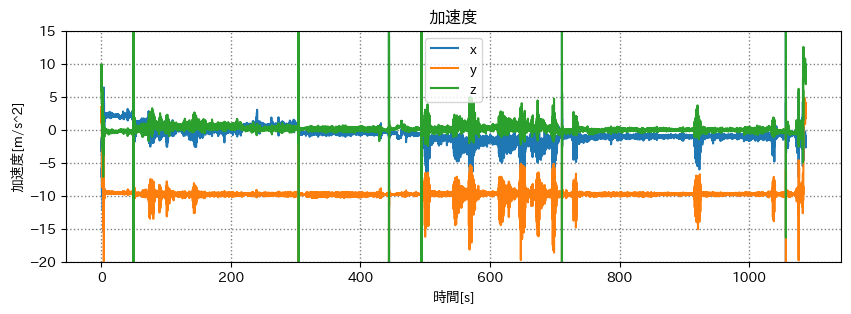

In [106]:
# 加速度
plot(
    df_acc,
    [
        ("time", "x"),
        ("time", "y"),
        ("time", "z"),
    ],
    title="加速度",
    xlabel="時間[s]",
    ylabel="加速度[m/s^2]",
    figsize=(10, 3),
    xlim=xlim,
    ylim=(-20, 15),
    grid=True
)


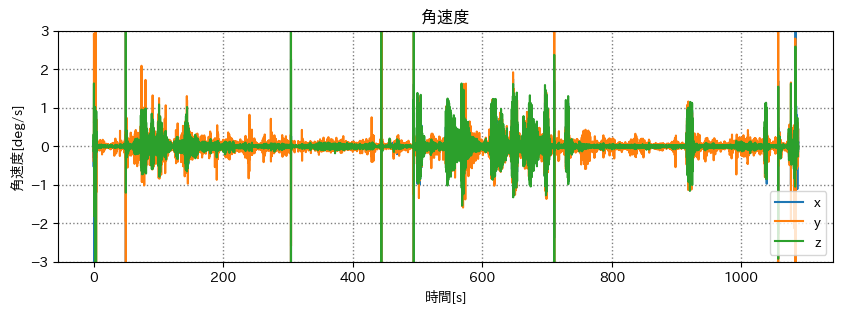

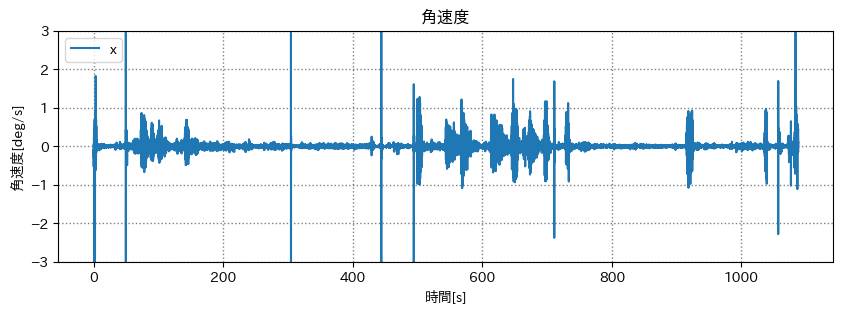

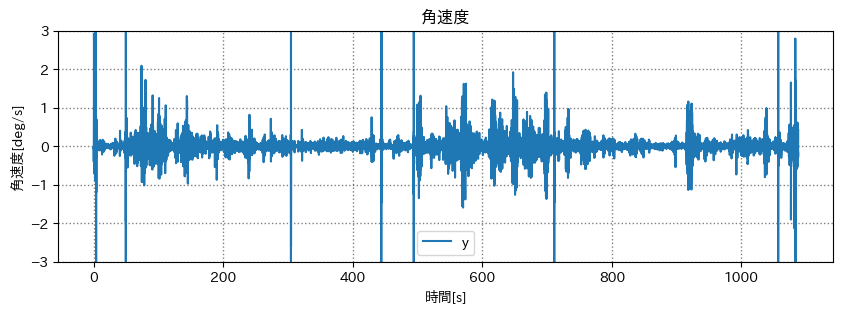

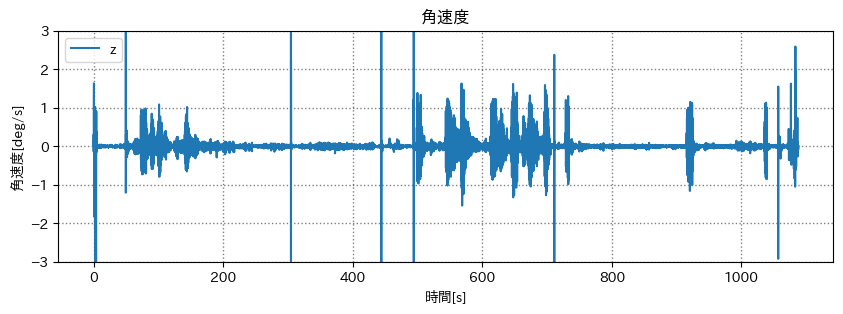

In [107]:
# 角速度
plot(
    df_gyro,
    [("time", "x"), ("time", "y"), ("time", "z")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    ylim = (-3, 3),
    grid=True
)

plot(
    df_gyro,
    [("time", "x")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    ylim = (-3, 3),
    grid=True
)

plot(
    df_gyro,
    [("time", "y")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    ylim = (-3, 3),
    grid=True
)

plot(
    df_gyro,
    [("time", "z")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    ylim = (-3, 3),
    grid=True
)


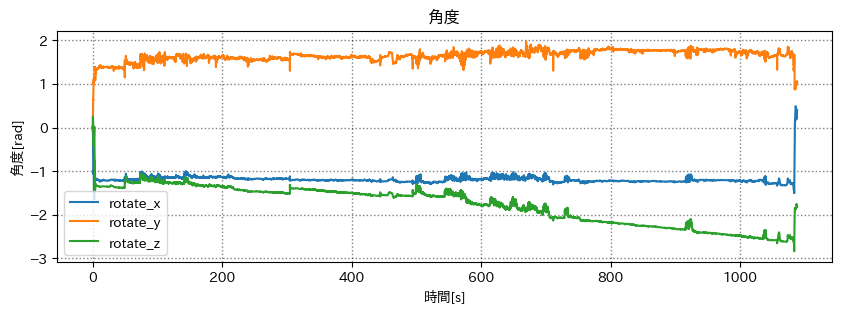

In [108]:
# 角度
plot(
    df_gyro,
    [("time", "rotate_x"), ("time", "rotate_y"), ("time", "rotate_z")],
    title="角度",
    xlabel="時間[s]",
    ylabel="角度[rad]",
    figsize=(10, 3),
    xlim = xlim,
    grid=True
)


In [109]:
# 気圧
plot(
    df_pressure,
    [("time", "pressure")],
    title="気圧",
    xlabel="時間[s]",
    ylabel="気圧[hPa]",
    figsize=(10, 3),
    xlim=xlim,
    ylim=(1001, 1007),
    grid=True
)


NameError: name 'df_pressure' is not defined